In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# I eventually figured it out. Place:
import warnings
# warnings.filterwarnings('ignore')
import urllib3
from tqdm import tqdm
from bs4 import BeautifulSoup
import os
import pandas as pd

In [ ]:

warnings.filterwarnings(action='once')
http = urllib3.PoolManager()
with open('bots.txt', 'r') as content_file:
    content = content_file.read()
bots = content.split('\n')
bots = list(set(bots))
for bot in tqdm(bots, total=len(bots)):
    r = http.request('get', 'https://gosvon.ru/?usr=' + str(bot))
    with open('data/' + str(bot) + '.html', 'wb') as fid:
        fid.write(r.data)


In [4]:


data = []
with open('23683018.html', 'rb') as html:
    soup = BeautifulSoup(html,"html.parser")
table = soup.find('table')
# table_body = table.find('tbody')

rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [5]:
os.getcwd()

'C:\\Users\\777\\Desktop\\DIPLOMA'

In [3]:

os.listdir('C:/Users/777/Desktop/DIPLOMA/data')

['100928992.html',
 '105835238.html',
 '116969845.html',
 '120492671.html',
 '123216104.html',
 '132461125.html',
 '133162362.html',
 '134030517.html',
 '136205375.html',
 '136685415.html',
 '138758704.html',
 '140447500.html',
 '141357931.html',
 '142216580.html',
 '142277946.html',
 '152660245.html',
 '155201172.html',
 '156644274.html',
 '158000183.html',
 '159027134.html',
 '160974813.html',
 '161616720.html',
 '161666360.html',
 '161765581.html',
 '161936582.html',
 '162299728.html',
 '168003569.html',
 '168438546.html',
 '168649094.html',
 '168661360.html',
 '169316487.html',
 '169353406.html',
 '170457136.html',
 '171360029.html',
 '171454842.html',
 '178655950.html',
 '182074547.html',
 '193348671.html',
 '197723273.html',
 '199811250.html',
 '200374284.html',
 '202537084.html',
 '210136967.html',
 '210283174.html',
 '213121134.html',
 '223516965.html',
 '223752066.html',
 '228619777.html',
 '232916764.html',
 '233766502.html',
 '233846754.html',
 '233928516.html',
 '234531660.

In [4]:
len(os.listdir('C:/Users/777/Desktop/DIPLOMA/data'))

815

In [112]:
data_global = list()
users = os.listdir('C:/Users/777/Desktop/DIPLOMA/data')
for file in tqdm(users, total=len(users)):
    data = []
    with open('data/' + file, 'rb') as html:
        soup = BeautifulSoup(html,"html.parser")
    table = soup.find('table')
    # table_body = table.find('tbody')
    if table:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append([ele for ele in cols if ele] + [file])
        data_global += data[3:]
    else:
        print("ERROR HAPPENED")

 32%|███▏      | 263/815 [01:51<05:07,  1.79it/s]

ERROR HAPPENED


 36%|███▌      | 294/815 [02:04<03:05,  2.81it/s]

ERROR HAPPENED
ERROR HAPPENED


 40%|███▉      | 322/815 [02:12<02:10,  3.78it/s]

ERROR HAPPENED


 54%|█████▎    | 438/815 [02:51<01:59,  3.16it/s]

ERROR HAPPENED


 63%|██████▎   | 512/815 [03:18<01:16,  3.95it/s]

ERROR HAPPENED


100%|██████████| 815/815 [04:41<00:00,  2.89it/s]


In [113]:
len(data_global)

53362

In [114]:
data_global[3]

['4',
 'tassagency',
 'Виталий Ширмаков',
 'https://vk.com/wall-26284064_2898369?reply=2898393',
 '#4 Смотреть (4/4)',
 '18:28:18 30.1.2020',
 'О какой развязке можно говорить, когда демократы до сих пор ничего существенного на Трампа не нарыли? Да, народ его не любит, Конгресс тоже. Но для импичмента существенная причина должна быть. Тем более, уже выборы скоро. Вряд ли он голоса наберет.',
 '100928992.html']

In [115]:
# data_global
import pandas as pd
data_global_new = [[x[1], x[2], x[3], x[5], x[6], int(x[7][:-5])] for x in data_global if len(x) == 8]
# data_global_new
df = pd.DataFrame(data_global_new,columns =['public', 'name', 'link','time', 'text', 'id'])
df.head(50)

,public,name,link,time,text,id
0,kommersant_ru,Виталий Ширмаков,https://vk.com/wall-23482909_1577239?reply=157...,18:53:55 30.1.2020,"Если даже в Сочи такие меры безопасности, то п...",100928992
1,rbc,Виталий Ширмаков,https://vk.com/wall-25232578_7590709?reply=759...,18:39:51 30.1.2020,Обстоятельства вносят свои коррективы. Тяжелее...,100928992
2,svpressa,Виталий Ширмаков,https://vk.com/wall-25853349_718366?reply=718372,18:36:46 30.1.2020,"Нам грех жаловаться на налоги, они у нас и так...",100928992
3,tassagency,Виталий Ширмаков,https://vk.com/wall-26284064_2898369?reply=289...,18:28:18 30.1.2020,"О какой развязке можно говорить, когда демокра...",100928992
4,meduzaproject,Виталий Ширмаков,https://vk.com/wall-76982440_3490566?reply=349...,17:46:00 22.12.2019,Санкции Штатам мешают только им самим в налажи...,100928992
5,izvestia,Виталий Ширмаков,https://vk.com/wall-27532693_1871554?reply=187...,16:39:47 22.12.2019,От Минских соглашений зависит стабилизация сит...,100928992
6,tassagency,Виталий Ширмаков,https://vk.com/wall-26284064_2834083?reply=283...,16:25:16 22.12.2019,Железнодорожная часть моста станет для Крыма с...,100928992
7,rbc,Виталий Ширмаков,https://vk.com/wall-25232578_7443081?reply=744...,16:13:30 22.12.2019,Макрон пытается восстановить рейтинг после тог...,100928992
8,tassagency,Виталий Ширмаков,https://vk.com/wall-26284064_2834053?reply=283...,15:51:58 22.12.2019,Пресс - конференция президента дает понимание ...,100928992
9,izvestia,Виталий Ширмаков,https://vk.com/wall-27532693_1871492?reply=187...,15:27:17 22.12.2019,Шанс для Украины сохранить транзит газа и адек...,100928992


In [116]:
df.to_csv('data_proc.csv')
# df = pd.read_csv('data_proc.csv')

groups = list(set(df['public']))

import dateutil.parser as dparser
df['time'] = df['time'].apply(lambda x : dparser.parse(x))

In [25]:
df.head(2)

,Unnamed: 0,public,name,link,time,text,id
0,0,kommersant_ru,Виталий Ширмаков,https://vk.com/wall-23482909_1577239?reply=157...,2020-01-30 18:53:55,"Если даже в Сочи такие меры безопасности, то п...",100928992
1,1,rbc,Виталий Ширмаков,https://vk.com/wall-25232578_7590709?reply=759...,2020-01-30 18:39:51,Обстоятельства вносят свои коррективы. Тяжелее...,100928992


In [80]:
len(df)

53353

In [178]:
def captcha_handler(captcha):
    """ При возникновении капчи вызывается эта функция и ей передается объект
        капчи. Через метод get_url можно получить ссылку на изображение.
        Через метод try_again можно попытаться отправить запрос с кодом капчи
    """

    key = input("Enter captcha code {0}: ".format(captcha.get_url())).strip()

    # Пробуем снова отправить запрос с капчей
    return captcha.try_again(key)

In [179]:
import json
import urllib.request
import os
# urllib.urlretrieve("http://www.digimouth.com/news/media/2011/09/google-logo.jpg", "local-filename.jpg")
import vk_api
vk_api.utils.enable_debug_mode
# import sys
# sys.stdout = open('file', 'w')
with open('accounts.json', 'r') as file:
    data = json.loads(file.read())
    accounts = data['accounts']
f = open('groups.txt', 'w+', encoding='utf-8')
f.close()
vk_apis = []
def init_apis():
    current_id = 0
    for account in accounts:
        vk_session = vk_api.VkApi(account['phone'], account['password'], captcha_handler=captcha_handler)
        vk_session.auth()
        vk_apis.append(vk_session.get_api())
        print('account', current_id, 'successfully inited')
        current_id += 1
init_apis()
# try:
#     os.mkdir('data')
# except:
#     print('directory already created')
# def posts(vk, query, start_time, end_time, count=200):
#     return vk.newsfeed.search(q = query, count=count, start_time=start_time, end_time=end_time)['items']

# # vk.newsfeed.search

# vk = vk_apis[0]
# result = posts(vk, '#протесты#москва', start_time=1563148800, end_time=1568505600)
vk = vk_apis[0]
def id_by_group(vk, group):
    return vk.groups.getById(group_id=group)[0]['id']
id_by_group(vk, '1tvnews')
id_by_group_dict = dict()
for g in groups:
    id_by_group_dict[g] = id_by_group(vk, g)
id_by_group_dict

account 0 successfully inited


{'rgru': 23304496,
 'oldlentach': 29534144,
 'tj': 28261334,
 'theinsiders': 61618124,
 'pravda_ru': 23877091,
 'vesti': 24136539,
 'tv360': 43618728,
 'tv5': 34777837,
 'kommersant_ru': 23482909,
 'readovkanews': 163061027,
 'rublacklist': 45023092,
 'meduzaproject': 76982440,
 'znak_com': 46437317,
 'rtvi': 134162128,
 'tassagency': 26284064,
 'smi2': 28700409,
 'mbkhmedia': 77266187,
 'mediazzzona': 75895730,
 'svobodaradio': 12637912,
 'novgaz': 6726778,
 '1tvnews': 49388814,
 'fontanka': 18901857,
 'true_lentach': 125004421,
 'life': 24199209,
 'ria': 15755094,
 'snob_project': 17760452,
 'teamnavalny': 55284725,
 'rentvchannel': 26493942,
 'lentaru': 67991642,
 'republicmag': 37923275,
 'nsn': 55611432,
 'currenttime': 78242229,
 'rbc': 25232578,
 'vedomosti': 15548215,
 'ura_ru': 25280329,
 'mk_ru': 20648295,
 'izvestia': 27532693,
 'tvrain': 17568841,
 'gazeta': 20169232,
 'fondbk': 87100272,
 'svpressa': 25853349,
 'echomsk': 60556804,
 'kpru': 15722194}

In [180]:
id_by_group_dict['meduzaproject']

76982440

In [181]:
from datetime import datetime
datetime.utcfromtimestamp(1584723884).strftime('%Y-%m-%d %H:%M:%S')

'2020-03-20 17:04:44'

In [182]:
tqdm._instances.clear()

In [183]:
datetime.utcfromtimestamp(vk.wall.get(owner_id=-76982440, count=1, offset=3000)['items'][0]['date']).strftime('%Y-%m-%d %H:%M:%S')

'2020-02-06 22:41:38'

In [47]:
# import time
# def posts_by_group(vk, group_id, count=100):
#     posts = []
#     its = 1 + (count - 1)//50
#     for i in range(its):
#         time.sleep(0.1)
#         if i != its - 1:
#             posts += vk.wall.get(owner_id=-group_id, count=50, offset=50*i)['items']
#         else:
#             posts += vk.wall.get(owner_id=-group_id, count=count%50, offset=50*i)['items']
#     return [x['id'] for x in posts]
# #     return posts
# ps = posts_by_group(vk, group_id=id_by_group_dict['meduzaproject'], count=201)
# print(ps, len(ps))

In [187]:
def comments_by_post(vk, owner_id, post_id, count=100):
    comments = vk.wall.getComments(owner_id=-owner_id, post_id=post_id)['items']
    return [(x['from_id'], x['text'], datetime.utcfromtimestamp(int(x['date'])).strftime('%Y-%m-%d %H:%M:%S')) for x in comments if 'deleted' not in x.keys()]
comments_by_post(vk, owner_id=76982440, post_id=3808152)

[(533496005, 'Неудачи — путь к успеху. Удачи Илону.', '2020-04-03 22:47:33'),
 (354173034, 'Упс хаха неловко вышло 👍', '2020-04-03 22:48:02'),
 (84785567,
  'Илон, не унывай)\nВ России всё попилили бы еще на этапе чертежей))',
  '2020-04-03 22:48:34'),
 (66145903,
  'Каждый месяц один - два удачных запуска. Никто не летает столько, сколько делает это спейс Х',
  '2020-04-03 22:48:41'),
 (8890532,
  'Частник в США запускает ракеты.\n\nРоссияне тихо обсирают чатсника)',
  '2020-04-03 22:49:23'),
 (95934963,
  'ахахах, америкашки опять облажались, не то что наша Россиюшка 😛😝💪🏻💪🏻💪🏻',
  '2020-04-03 22:49:48'),
 (583837502,
  'Ничего страшного. Построят еще. Самое главное успеть до развала экономики. \nЗы я не экономист, не пинайте черти. Я верю в Илона больше чем в Иисуса.',
  '2020-04-03 22:50:00'),
 (332152725,
  'Так любят обращать внимание на неудачи\nПохоже на ошибку выжившего',
  '2020-04-03 22:50:01'),
 (1460113,
  'Отрицательный результат тоже результат! Илон Маск справится!',
  '20

In [185]:
len(groups)

43

In [36]:
import time
def find_offset_by_group(g):
    left_shift = 100
    right_shift = 20000
    shift = 10050
    cur_date = '2020-04-01'
    counter_stop = 0
    while counter_stop < 20:
        assert right_shift >= left_shift
        counter_stop += 1
        time.sleep(0.1)
        response = vk.wall.get(owner_id=-id_by_group_dict[g], count=1, offset=shift)['items']
        if len(response) > 0:
            cur_date = datetime.utcfromtimestamp(response[0]['date']).strftime('%Y-%m-%d %H:%M:%S')
    #         print(cur_date, shift)
            if cur_date  < '2019-10-05':
                if cur_date < '2019-10-01':
                    right_shift = shift
                    shift = (left_shift + right_shift) // 2
                else:
                    return shift
            else:
                left_shift = shift
                shift = (left_shift + right_shift) // 2
        else:
            right_shift = shift
            shift = (left_shift + right_shift) // 2
    return shift
find_offset_by_group('tvrain')

7406

In [50]:
from collections import defaultdict
offset_by_group = defaultdict()
for g in tqdm(groups, total=len(groups)):
    offset_by_group[g] = find_offset_by_group(g)
offset_by_group

100%|██████████| 43/43 [02:54<00:00,  4.06s/it]


defaultdict(None,
            {'mbkhmedia': 3869,
             'lentaru': 10050,
             'tj': 5075,
             'nsn': 9428,
             'rentvchannel': 19999,
             'svobodaradio': 3520,
             'rbc': 6940,
             'currenttime': 2470,
             'meduzaproject': 7873,
             'tv360': 7251,
             'vesti': 10050,
             'true_lentach': 3209,
             'tvrain': 7406,
             'fondbk': 100,
             'kommersant_ru': 14247,
             'mk_ru': 19999,
             'ria': 12226,
             'rtvi': 3753,
             'oldlentach': 4453,
             'gazeta': 19999,
             'teamnavalny': 448,
             'republicmag': 1304,
             'mediazzzona': 2431,
             'tassagency': 18134,
             'snob_project': 6318,
             'kpru': 7717,
             'theinsiders': 3675,
             'fontanka': 4608,
             'tv5': 18756,
             'rublacklist': 817,
             'znak_com': 7095,
             'ur

In [51]:
offset_by_group_id = defaultdict()
for g in groups:
    offset_by_group_id[id_by_group_dict[g]] = offset_by_group[g]

In [188]:
groups_ratios = dict()
for g in groups:
    groups_ratios[id_by_group_dict[g]] = (len(df[df['public']==g])/len(df))

In [52]:
import time
def posts_by_group(vk, group_id, count=100):
    posts = []
    its = 1 + (count - 1)//50
    for i in range(its):
        time.sleep(0.1)
        if i != its - 1:
            posts += vk.wall.get(owner_id=-group_id, count=50, offset=50*i + int((i/its) * offset_by_group_id[group_id]))['items']
        else:
            posts += vk.wall.get(owner_id=-group_id, count=count%50, offset=50*i + int((i/its) * offset_by_group_id[group_id]))['items']
    return [x['id'] for x in posts]
#     return posts
ps = posts_by_group(vk, group_id=id_by_group_dict['meduzaproject'], count=201)
print(ps, len(ps))

[3859944, 3859886, 3859835, 3859768, 3859735, 3859661, 3859586, 3859501, 3859365, 3859260, 3859152, 3859074, 3858968, 3858875, 3858791, 3858719, 3858599, 3858543, 3858436, 3858367, 3858317, 3858265, 3858201, 3858142, 3858087, 3858004, 3857891, 3857842, 3857703, 3857553, 3857445, 3857380, 3857257, 3857124, 3857047, 3857025, 3856944, 3856860, 3856797, 3856744, 3856691, 3856619, 3856558, 3856494, 3856427, 3856368, 3856308, 3856272, 3856238, 3856196, 3718771, 3718699, 3718596, 3718467, 3718325, 3718158, 3718035, 3717980, 3717880, 3717797, 3717704, 3717593, 3717496, 3717385, 3717264, 3717238, 3717162, 3717096, 3717038, 3716970, 3716877, 3716741, 3716650, 3716570, 3716476, 3716350, 3716240, 3716192, 3716114, 3715917, 3715788, 3715704, 3715561, 3715485, 3715402, 3715346, 3715316, 3715278, 3715237, 3715177, 3715128, 3715077, 3715045, 3715029, 3714987, 3714955, 3714908, 3714855, 3714798, 3714729, 3599531, 3599423, 3599332, 3599272, 3599219, 3599135, 3599045, 3598986, 3598857, 3598827, 3598726, 

In [53]:
from tqdm import tqdm
# tqdm._instances.clear()

In [65]:
all_comments = list()
import time
for k in list(id_by_group_dict.keys()):
    v = id_by_group_dict[k]
    posts = posts_by_group(vk, group_id=v, count=int(10000 * groups_ratios[v]))
    time.sleep(0.1)
    for post in tqdm(posts, total=len(posts)):
        try:
            comments_ = comments_by_post(vk, owner_id=v, post_id=post)
            all_comments+=[(k, comment_[0], comment_[1], comment_[2]) for comment_ in comments_]
        except:
            all_comments+=[(k, None, None, None)]

100%|██████████| 522/522 [04:15<00:00,  2.04it/s]
0it [00:00, ?it/s]
100%|██████████| 189/189 [01:33<00:00,  2.01it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


In [68]:
all_comments[:40]

[('mbkhmedia',
  154742629,
  '12 штук когда лимоны по 470, цены на все растут, жители были бы довольны, если эти 200 миллиардов которые растащат якобы помогая регионам, разделят по стране, по 1 миллиону каждому жителю страны и ещё 60000 миллионов останется с 200 миллиардов. Этих денег людям хватит на год. Народ бы успокоился',
  '2020-04-16 14:29:29'),
 ('mbkhmedia',
  23051150,
  'В обществе сформировался запрос на революцию и на действия в стиле Степана Халтурина. Даже менты нервничают и не могут вести себя адекватно, так как им тупо страшно',
  '2020-04-16 14:36:30'),
 ('mbkhmedia',
  154742629,
  'Ёлки зелёные, это же отмывание 200 миллиардов, считайте, они кому то выдадут по 12 тысяч, и то не всем, остальные то где осядут? Я привёл пример как помочь людям сразу на год вперёд, причём ещё 60000 миллионов экономии, но они кинут вам копейки и то не всем, получается остальные деньги с этих 200 миллиардов, уйдут в тень',
  '2020-04-16 14:43:23'),
 ('mbkhmedia',
  154742629,
  '[id38602

In [69]:
import pickle
with open('comments.pkl', 'wb') as f:
    pickle.dump(all_comments, f)

# START HERE

In [3]:
# df.to_csv('data_proc.csv')
df = pd.read_csv('data_proc.csv')

groups = list(set(df['public']))

import dateutil.parser as dparser
df['time'] = df['time'].apply(lambda x : dparser.parse(x))

In [4]:
import pickle
all_comments=[]
with open('supercomments.pkl', 'rb') as f:
    all_comments=pickle.load(f)

In [5]:
len(all_comments)

368797

In [6]:
from collections import defaultdict
comment_dict = defaultdict(int)
for cm in all_comments:
    comment_dict[(cm[0], cm[1])] += 1
comment_dict = {k: v for k, v in sorted(comment_dict.items(), key=lambda item: -item[1])}
# comment_dict

In [7]:
bots = os.listdir('C:/Users/777/Desktop/DIPLOMA/data')
bots_ids = [int(x[:-5]) for x in bots]
# bots_ids

In [8]:
# counter = 0
# users_ids = set([x[1] for x in all_comments])
# for k in users_ids:
#     if k in bots_ids:
#         counter += 1
# print("KK JF : " ,counter, len(bots_ids))

### DF

In [9]:
# len(all_comments)

In [10]:
all_comments = [list(x) for x in all_comments]
# all_comments

In [11]:
df_other = pd.DataFrame(all_comments, columns =['public', 'id', 'text', 'time'])
# df_other.head()

# df_other = pd.concat([df_other, df_])

# df_other = pd.concat([df_other,pd.get_dummies(df['public'])],axis=1)
# df_other.drop('public',axis=1, inplace=True)
# df_other.head(10)

df_other = df_other[~pd.isnull(df_other.id)]

# for g in groups:
#     df_other[g] = df_other['id'].apply(lambda x : comment_dict[(g, int(x))] if (g, int(x)) in comment_dict.keys() else 0)

In [12]:
tqdm.pandas()

In [13]:
df_other['target'] = df_other['id'].progress_apply(lambda x : int(x in bots_ids))
# df_other

100%|██████████| 368797/368797 [00:03<00:00, 117527.27it/s]


In [14]:
df_other['target'].describe()

count    368797.000000
mean          0.041014
std           0.198324
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

In [15]:
len(df_other[df_other['target'] == 1])

15126

In [16]:
15126*2

30252

In [17]:
# df_other = df_other[df_other['target'] != 1]
# df_other = pd.concat([df_other, df_])

In [18]:
# len(df_other)

In [19]:
from nltk.corpus import stopwords
stop = set(stopwords.words('russian'))
# stop

# ML

In [20]:
import dateutil.parser as dparser
df_other['time'] = df_other['time'].apply(lambda x : dparser.parse(x))

C:\Users\777\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([737501., 737505., 737509., 737513., 737516., 737520., 737524.,
        737528., 737532.]), <a list of 9 Text xticklabel objects>)

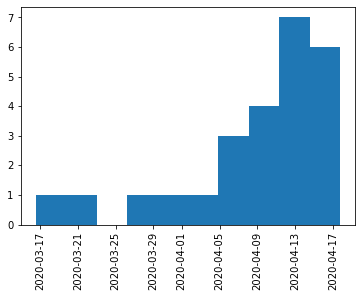

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df_other[df_other['target'] == 1][df_other['text'].str.contains('Мехрибан')]['time'])
plt.xticks(rotation=90)

In [22]:
import string
df_other['clean_text'] = df_other['text'].progress_apply(lambda x : ''.join(xx if xx.isalpha() else ' ' for xx in x))

df_other['len'] = df_other['clean_text'].progress_apply(lambda x : len(x.split()))
# df_other['len'].describe()

df_other_long = df_other[df_other['len'] > 3]

df_other_long = df_other_long.sample(frac=1).reset_index(drop=True)

100%|██████████| 368797/368797 [00:00<00:00, 508684.58it/s]


In [23]:
texts = list(df_other_long['clean_text'])
# s = texts[1]
# # import string
# s = s.translate(str.maketrans('', '', string.punctuation))
# print(texts[1])
# print(s)

### Sklearn

In [27]:
df_other_long

,public,id,text,time,target,clean_text,len
0,vedomosti,102888773,"Кризис мировой, а в жопе будет Россия",2020-04-05 13:23:10,0,Кризис мировой а в жопе будет Россия,7
1,znak_com,162259795,"Петров, откуда вы беретесь, уебаны генетические?!",2020-03-20 07:04:56,0,Петров откуда вы беретесь уебаны генетические,6
2,ria,165246811,Пускай в этом году каждой крысе достанется по ...,2019-12-31 19:30:40,0,Пускай в этом году каждой крысе достанется по ...,9
3,meduzaproject,562601144,Кого нибудь поживее нельзя выбрать ?,2020-03-03 01:02:19,0,Кого нибудь поживее нельзя выбрать,5
4,gazeta,103358230,А у неё каждый день праздник. Чай НЕ ЗАРАБОТАЛ...,2020-04-16 16:25:16,0,А у неё каждый день праздник Чай НЕ ЗАРАБОТАЛ...,11
5,oldlentach,306871351,Россия ничего не запустит. Пять,2020-03-17 18:41:04,0,Россия ничего не запустит Пять,5
6,meduzaproject,20359098,"Поправки + Конституция = Проституция.\nКстати,...",2020-02-15 02:16:50,0,Поправки Конституция Проституция Кстати ...,9
7,tv5,3635000,в ленте перед этой сьемкой наверное сутки гото...,2020-04-15 03:44:29,0,в ленте перед этой сьемкой наверное сутки гото...,8
8,lentaru,39931,"В индии вроде так, а 1,3 млрд палками гоняют",2020-03-31 12:07:04,0,В индии вроде так а млрд палками гоняют,8
9,ria,44640963,https://vk.com/app7301988#by=44640963_938d2d7b...,2020-01-31 23:15:52,0,https vk com app by d d b...,13


In [28]:
list(df_other_long[df_other_long['target']==1]['clean_text'])[:25]

['Разумные меры  Так сказать  чтобы было неповадно заниматься ерундой и заодно распространять заразу ',
 'а беспилотных самолётов и поездов когда ожидать          ',
 'Помню вроде за первые же выходные только в Москве показатели гуляк снизились на         хотя и шашлычников много тогда всплыло  Сегодня на улицах реально поскромнее  до народа все больше доходит понимание ситуации ',
 'Этого вполне должно хватить  если смотреть по опыту Китая',
 'Интересно  сколько будет стоить эти санитайзеры',
 'Хорошо  что у неё животных никаких не было  а то страшно даже представить  как бы она их  спасала  от вируса ',
 'Будет надо  введут и карантин  но и самоизоляция должна помочь  если люди будут несколько более ответственными ',
 'Пусть уже появится массовый иммунитет человечества и короновирус останется в прошлом ',
 'Отвратительная инфографика  но большая часть всех плюсов приходится на США  особенно по количеству зараженных  Россию в этих цифрах сложно будет отыскать ',
 'Люди  которые реагир

In [29]:
# df_other['clean_text_token'] = df_other['clean_text'].progress_apply(lambda x : x.split())
# df_other[['text', 'clean_text', 'clean_text_token']].head()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=3, lowercase=False)
X = vectorizer.fit_transform(texts)
y = df_other_long['target'].values

In [42]:
print(texts[0])
print(X[0])
print(X.shape)
print(y[0])

Ну конечно зачем пускать все силы сразу потрачено
  (0, 65677)	0.5241134288945414
  (0, 79857)	0.30592119790827327
  (0, 76295)	0.4035333927899504
  (0, 28470)	0.18893596698411835
  (0, 70771)	0.4418794097925742
  (0, 38806)	0.3085266438350099
  (0, 43493)	0.29865437412280166
  (0, 11919)	0.2313888451688421
(273232, 91141)
1


In [43]:
(y==0).sum(), (y==1).sum()

(259165, 14067)

In [44]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\h5py\__init__.py:75: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


[(0, 14067), (1, 14067)]


In [45]:
X_resampled.shape


(28134, 91141)

In [46]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

### MODEL SELECTION

## XGBoost

In [2]:
import xgboost as xgb

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

In [65]:
xg_reg = xgb.XGBClassifier()

In [66]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76      2795
           1       0.79      0.68      0.73      2832

    accuracy                           0.75      5627
   macro avg       0.75      0.75      0.75      5627
weighted avg       0.75      0.75      0.75      5627



## SKlearn

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 4
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_resampled, y_resampled, scoring='accuracy', cv=CV)
    print("OK")
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

OK
OK
OK
OK


In [49]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.754194
1,RandomForestClassifier,1,0.756611
2,RandomForestClassifier,2,0.760700
3,RandomForestClassifier,3,0.760131
4,LinearSVC,0,0.752914
5,LinearSVC,1,0.772391
6,LinearSVC,2,0.767525
7,LinearSVC,3,0.768378
8,MultinomialNB,0,0.675149
9,MultinomialNB,1,0.696332


In [50]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.765302,0.008527
LogisticRegression,0.768608,0.007481
MultinomialNB,0.687176,0.008867
RandomForestClassifier,0.757909,0.003067


### MODEL EVALUATION

In [35]:
def predict_with_threshold(X_test, model, th=0.5):
    preds = model.predict_proba(X_test)
    return [x[1] >= th for x in preds]

In [52]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = predict_with_threshold(X_test, model)

In [53]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2778
           1       0.79      0.71      0.75      2849

    accuracy                           0.76      5627
   macro avg       0.76      0.76      0.76      5627
weighted avg       0.76      0.76      0.76      5627



In [54]:
def predict_with_threshold(X_test, model, th=0.5):
    preds = model.predict_proba(X_test)
    return [x[1] >= th for x in preds]
best_th = 0
best_score = 0
for i in tqdm(range(1000)):
    y_pred = predict_with_threshold(X_test, model, th=i/1000.0)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_th = i/1000.0
print(best_score, best_th)

100%|██████████| 1000/1000 [00:03<00:00, 296.03it/s]

0.7659498844855163 0.48


In [138]:
clf = model
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

In [139]:

sorted_idx, len(sorted_idx)

(array([   63, 19414, 14623, ..., 23483,  2420, 25286], dtype=int64), 26007)

In [ ]:
neg_words = list()
for ind in sorted_idx[:1000]:
    neg_words.append(vectorizer.get_feature_names()[ind])
neg_text = ' '.join(neg_words)
print(neg_text[:1000])
print()
pos_words = list()
for ind in sorted_idx[-1000:]:
    pos_words.append(vectorizer.get_feature_names()[ind])
pos_text = ' '.join(pos_words)
print(pos_text[:1000])

In [28]:
bots_sentences = list(df_other_long[df_other_long['target']==1]['clean_text'])

not_bots_sentences = list(df_other_long[df_other_long['target']==0]['clean_text'])

Text(0.5, 1.0, 'Word count frequency : bots commentaries')

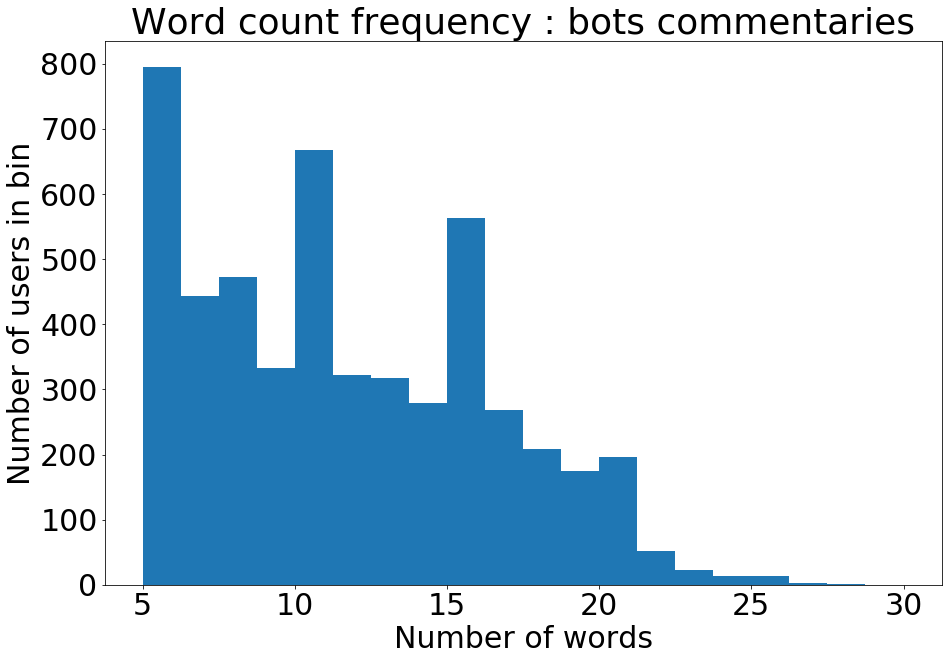

In [29]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 30})

plt.hist([len(x.split(' ')) for x in bots_sentences if len(x) < 100], bins=20, range=[5, 30])

plt.xlabel('Number of words')
plt.ylabel('Number of users in bin')
plt.title('Word count frequency : bots commentaries')


Text(0.5, 1.0, 'Word count frequency : real accounts commentaries')

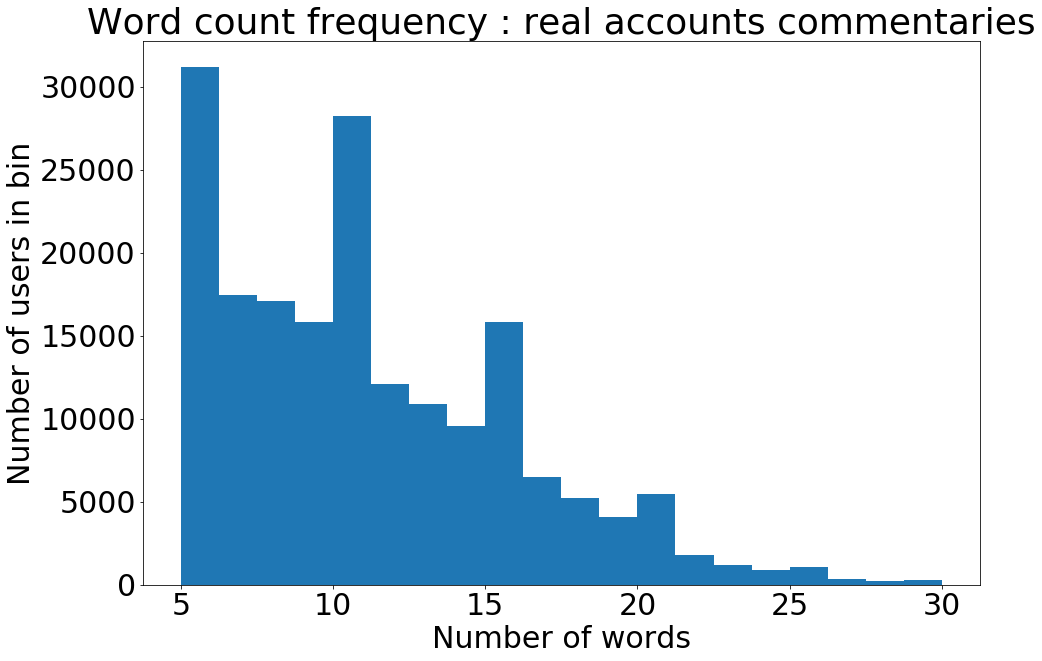

In [30]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 30})

plt.hist([len(x.split(' ')) for x in not_bots_sentences if len(x) < 100], bins=20, range=[5, 30])

plt.xlabel('Number of words')
plt.ylabel('Number of users in bin')
plt.title('Word count frequency : real accounts commentaries')


In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

bots_text = ' '.join(bots_sentences)

stop = set(stop)
stop.update(["это", "людей", "люди", "просто", "россии", "вообще", "будут", "вирус", "нужно", "очень", "которые", "еще", "пока"])

In [32]:
not_bots_text = ' '.join(not_bots_sentences)

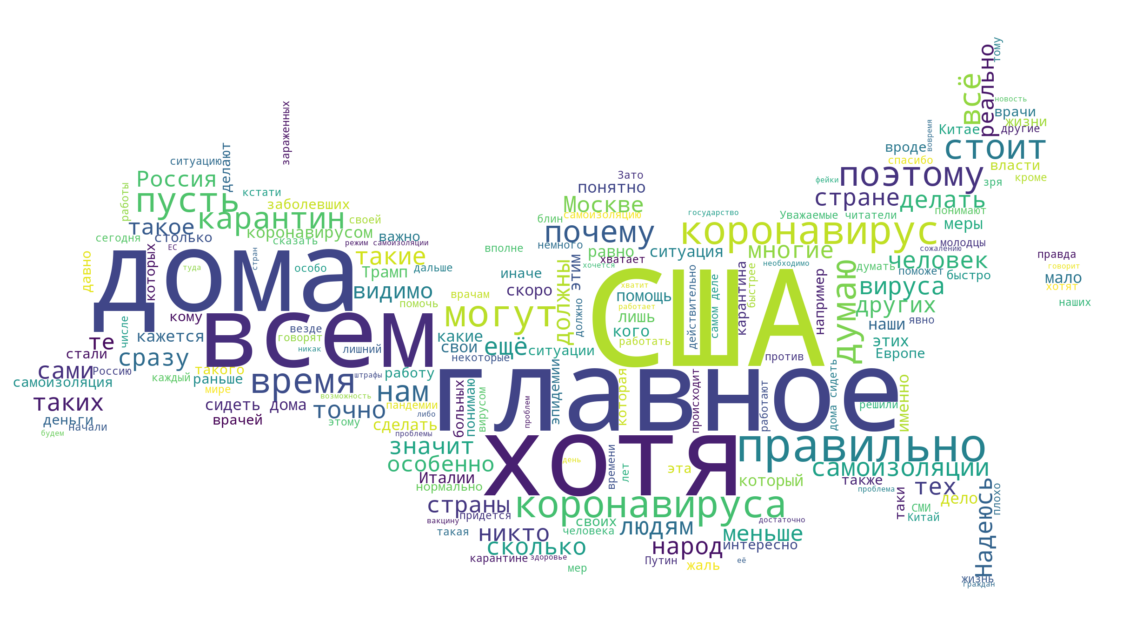

In [48]:
from PIL import Image
wine_mask = np.array(Image.open("russia.png"))

wine_mask = np.where(wine_mask > 128, 0, 255)
awordcloud = WordCloud(width=1600, height=800, stopwords=stop, background_color="white", mask=wine_mask).generate(bots_text)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

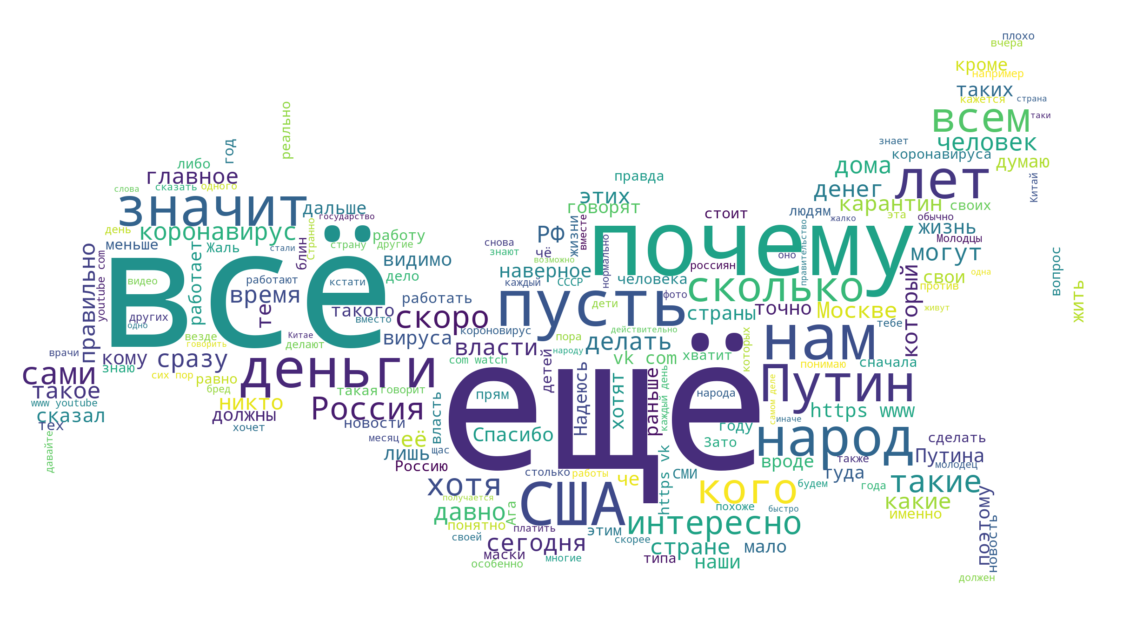

In [49]:
from PIL import Image
wine_mask = np.array(Image.open("russia.png"))

wine_mask = np.where(wine_mask > 128, 0, 255)

wordcloud = WordCloud(width=1600, height=800,stopwords=stop, background_color="white", mask=wine_mask).generate(not_bots_text)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [103]:
from collections import defaultdict
num_of_words_in_bots = 0
number_in_bots = defaultdict(int)
for sen in tqdm(bots_sentences, total=len(bots_sentences)):
    for word in sen.split(' '):
        number_in_bots[word] += 1
        num_of_words_in_bots+=1
print(num_of_words_in_bots)


100%|██████████| 14067/14067 [00:00<00:00, 111645.03it/s]

358983


In [35]:
from pymystem3 import Mystem
mystem = Mystem()

In [52]:
import time
time.time()

1589226830.7898755

In [36]:
import time
time1 = time.time()
from collections import defaultdict
num_of_words_in_bots = 0
number_in_bots = defaultdict(int)
words = mystem.lemmatize(bots_text)
words = [word for word in words if len(word) > 2]
for word in tqdm(words, total=len(words)):
    number_in_bots[word] += 1
    num_of_words_in_bots+=1
time2 = time.time()
print(num_of_words_in_bots)
print(time2 - time1)

100%|██████████| 232417/232417 [00:00<00:00, 2003595.91it/s]

232417
15.047999382019043


In [55]:
len(not_bots_text)/len(bots_text)

14.088512564046042

In [37]:
import time
time1 = time.time()
from collections import defaultdict
num_of_words_in_not_bots = 0
number_in_not_bots = defaultdict(int)
full = len(not_bots_text)
for i in tqdm(range(20)):
    if i != 19:
        words = mystem.lemmatize(not_bots_text[i * (full//20): (i+1) * (full//20)])
    else:
        words = mystem.lemmatize(not_bots_text[i * (full//20): (full - 1)])
    words = [word for word in words if len(word) > 2]
    for word in words:
        number_in_not_bots[word] += 1
        num_of_words_in_not_bots+=1
time2 = time.time()
print(num_of_words_in_not_bots)
print(time2 - time1)

100%|██████████| 20/20 [03:19<00:00,  9.97s/it]

3388963
199.48818731307983


In [40]:
relations = defaultdict()
for word in set(number_in_not_bots.keys()).intersection(set(number_in_bots.keys())):
    if number_in_not_bots[word] >= 10 and number_in_bots[word] >= 10:
        relations[word] = (number_in_not_bots[word] / number_in_bots[word]) / (num_of_words_in_not_bots/num_of_words_in_bots)
for w in sorted(relations, key=relations.get, reverse=True)[:50]:
    if len(w) > 3 and ' ' not in w:
        print(w, relations[w])

ссср 6.78947601375406
кремль 5.328709962310005
твой 5.026955472809824
четыре 4.553749568820906
дорога 4.544605493381505
спать 4.231420909582076
хрен 4.146486516558424
фонд 4.142266174047932
класс 4.105689872290334
мужчина 3.9839074130292422
короновирус 3.915783037250124
кормить 3.9153268472337466
пять 3.7554717829613367
богатый 3.7376408358545077
чиновник 3.731925788704883
путин 3.722869637067786
посылать 3.7102086095363096
песня 3.7102086095363096
карман 3.6784121653947617
федерация 3.621053874002165
русский 3.5703882315165134
господин 3.5456152516271207
уничтожать 3.5025074674128085
мама 3.440458384074027
миллиард 3.3806184786250166
депутат 3.2981017550742866
млрд 3.244388304940751
советский 3.2428810397584327
прощать 3.218011164250176
ночь 3.184097697648008
чума 3.175280196331444
бабка 3.1261307908446727
продавать 3.1253143555375833
завод 3.1204157436950477
зима 3.113557687115498
голосовать 3.1125026014878756
молчать 3.0923600576877996
утро 3.090697498517
платить 3.0861254607973
час

In [158]:
[x for x in bots_sentences if 'Мишустин' in x]

['Мишустин с самого начала сказал о личной ответственности чиновников  Так что им некогда расслабляться ',
 'Думаю с этим затягивать не станут  Мишустин может быстро и без бюрократии сделать  чтобы обеспечить страну тестами  Они в таком количестве пока не нужны и  надеюсь  не понадобятся  но пусть лежат на всякий случай',
 'Уважаемые читатели     Отметим также  что проблем с поставками продуктов в российские магазины нет  Об этом заявил премьер министр РФ Михаил Мишустин на видеосовещании с депутатами Госдумы от КПРФ     Глава кабмина подчеркнул  что всплеск спроса на ряд продуктов  в частности  гречу  крупы  макароны  был временным  и сейчас никаких перебоев с поставками товаров в магазины нет  Он также обратил внимание  что ситуация с коронавирусом никак не повлияла на посевную кампанию      Даже сейчас  когда в ряде отраслей из за коронавируса снизилась деловая активность  посевная идет по плану     сказал он     Как отмечалось ранее  в Федеральной антимонопольной службе ранее сообщ

In [147]:
bots_sentences[:10]

['кто их знает  не удивлюсь что и то и другое  ',
 'Что ни говори  а власти США просто упустили момент  когда надо было вводить ограничения  Вот по этому американцы и бьют  рекорды  по числу заболевших и умерших в мире  Да и медицина их оказалась фейковой во многом ',
 'обнадеживает  что на фоне общемирового насления заболевших не так много  ну и смертей в соотношении с выздоровевшими немного',
 'надо дочитать до конца статью  Скорее всего будет применено для зараженных легкой формой  находящихся дома ',
 'во всяком случае даже во время вируса можно подзаработать  В интернете  либо еще гле',
 'А не сама ли себя разоблачила Соболь  Откуда такие познания в плане ботов и накруток  соотношения комментариев с числом просмотров ',
 'о боже  вы и на этом этом хотиете заработать  где люди которые отслеживали бы это',
 'Поэтому Штаты и пытаются вставлять палки в колеса реализации  Северного Потока       Очень не хотят конкуренции ',
 'По сути это на пике  Итого  смертность у    зараженных  Гора

In [148]:
not_bots_sentences[:10]

['Путин убивает Россию   медленно и верно  Одного шанса на структурную перестройку всей промышленности за счет халявных нефтедолларов нулевых   он уже нас ЛИШИЛ  Сейчас продолжает свое черное дело во всех отраслях от медицины до пенсионного обеспечения',
 'Нужно и вводить карантин для пожилых а не для всех',
 'В чем прикол вообще  Наверное  поймут только те  кто смотрит тв ',
 'Недавно читал о скором возобновлении производства самолёта ан    его надо предложить арабам  Возможно их это заинтересует   ',
 '  Toto  I ve a feeling we re not in Kansas anymore  ',
 'Адекватного хотел сказать     ',
 'США не позволят  через саудитов так и будут шоу устраивать  Им несмотря ни на что нужны низкие цены  они с их помощью экономики стран мира рушат  Да никто и не согласится меньше добывать  Что бы они не говорили ',
 'кому то по смс деньги собирают  а кто то    мульярдов списывает',
 'Пять лет назад эти люди сокращали инфекционные койки  сегодня закрывают храмы на Пасху  но при этом не закрывая   

In [175]:
model.predict_proba(X_test)[:, 1]

array([0.63815953, 0.64224806, 0.24521712, ..., 0.61552002, 0.4365695 ,
       0.63898158])

In [55]:
counter = 0
for i in range(len(bots_sentences)):
    if counter==50:
        break
    if model.predict(vectorizer.transform([bots_sentences[i]]))[0] != 1:
        print(bots_sentences[i])
        print()
        counter += 1

Светлая память  Замечательный человек и специалист  сколько она спасла жизней   

Хлопок хлопок   взрыв  так и пишите  а то и за фейк получить можно

ой не верю я  что он действительно болел коронавирусом  бывший юрист мошенник  занесен в черный список коллегией адвокатов   в Мосгордуму попал с помощью накрути голосов через УГ 

Я бы и за один день сходил   Поправки помогут укрепить суверенитет  против только НКО шки всякие прозападные выступают 

Очередной мигрант  который приехал в Великобританию и плевал на законы и равноправие  Просто убил жену  потому что она ему перечила  Вот к чему привела тяга к толерантности

Здороваться на расстоянии  А не пробовали просто на дистанции в       метра говорить слово  Привет   По моему  самый простой способ 

Не охотно  потому что уже привык красиво и роскошно жить 

Хотелось бы увидеть бой героя России Кадырова с егором жуковым

Россия помогает всем и своим и чужим Молодец Россия

зато весело проводят время

Скоро будет аномально жаркое лето 



In [56]:
counter = 0
for i in range(len(not_bots_sentences)):
    if counter==50:
        break
    if model.predict(vectorizer.transform([bots_sentences[i]]))[0] != 0:
        print(bots_sentences[i])
        print()
        counter += 1

Ну конечно зачем пускать все силы сразу потрачено

США только и делают  что угрожают кому то  А у самих внутри страны по тысячи человек в день мрёт   Лучше бы этим озаботились 

И потом западные СМИ умудряются заявлять  что это мы что то не то распространяем о ситуации в Штатах и Европе  Подгорает у них до сих пор от того  что принятые Россией жесткие меры с карантином и т д   которые на Западе критиковали  оказались эффективны  а у них там полная задница наступила 

такая методика тоже хороша и быстрее запоминается  

Блин  оставайтесь уже все дома   только так и все вместе мы можем одолеть коронавирус 

не стоит отчаиватся и паниковать  всего лишь мойте руки  ведь нам об этом не зря говорят с детсва

Конечно  первую очередь надо позаботиться о здоровье сейчас  в том числе о здоровье ветеранов  ведь они входят в группу риска по заболеванию  Так что в мае поздравления будут в режиме онлайн и по тв  а вот когда с ситуацией по коронавирусу разберутся  тогда и парад устроят 

ВОЗ стараетс

In [176]:
y_proba = model.predict_proba(X_test)[:, 1]

In [178]:
len(y_proba[y_test==1])

10201

(array([  92.,  362.,  580.,  803., 1010., 1124., 1254., 1490., 1695.,
        1791.]),
 array([0.03815891, 0.1342961 , 0.23043328, 0.32657046, 0.42270765,
        0.51884483, 0.61498202, 0.7111192 , 0.80725638, 0.90339357,
        0.99953075]),
 <a list of 10 Patch objects>)

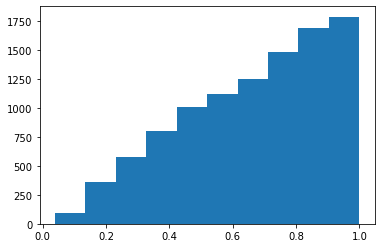

In [180]:
import matplotlib.pyplot as plt
plt.hist(y_proba[y_test==1])

(array([ 747., 2188., 2213., 1674., 1284.,  831.,  610.,  392.,  211.,
          71.]),
 array([0.00174065, 0.1015518 , 0.20136294, 0.30117408, 0.40098522,
        0.50079636, 0.60060751, 0.70041865, 0.80022979, 0.90004093,
        0.99985208]),
 <a list of 10 Patch objects>)

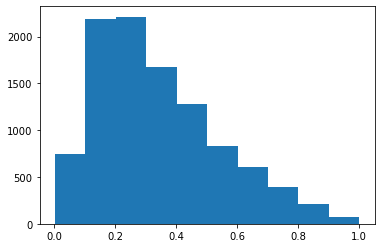

In [181]:
import matplotlib.pyplot as plt
plt.hist(y_proba[y_test==0])

In [205]:
print(df_other_long[df_other_long['target']==1.0][df_other_long['pred_prob'] < 0.2]['clean_text'].iloc[53])

Может жениться успею как раз и получит жена денег из казны 


C:\Users\777\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### BERT MODEL

In [99]:
import torch
from torchtext import data
from torchtext import datasets

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [100]:
fields = [(None, None), ('text',TEXT),('label', LABEL)]

In [101]:
df_other_long['len'] = df_other_long['clean_text'].apply(lambda x : len(x.split()))
df_other_long = df_other_long[df_other_long['len'] > 2]
df_other_long = df_other_long[df_other_long['len'] < 100]

In [102]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_other_long['clean_text'].values.reshape(-1, 1), df_other_long['target'].values)

In [103]:
all_comments_cut = [(x[0][0], x[1]) for x in zip(X_resampled, y_resampled)]

In [104]:
df_other_cut = pd.DataFrame(all_comments_cut, columns =['text', 'label'])
# df_other_cut.head()

In [105]:
df_other_cut = df_other_cut.sample(frac=1).reset_index(drop=True)

In [106]:
df_train = df_other_cut.iloc[:int(0.8 * len(df_other_cut)), :]
df_test = df_other_cut.iloc[int(0.8 * len(df_other_cut)):, :]

In [107]:
# df_other_torch = df_other_long[['text', 'label']]
df_train['label'] = df_train['label'].apply(lambda x : int(x))
df_test['label'] = df_test['label'].apply(lambda x : int(x))
df_train.to_csv('cut2.csv')

C:\Users\777\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\777\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
df_test.to_csv('cut3.csv')
#loading custom dataset
test_data=data.TabularDataset(path = 'cut3.csv',format = 'csv',fields = fields,skip_header = True)

#loading custom dataset
training_data=data.TabularDataset(path = 'cut2.csv',format = 'csv',fields = fields,skip_header = True)

#print preprocessed text
print(vars(training_data.examples[0]))

{'text': ['Ну', 'это', 'правильно', 'Масштаб', 'проведения', 'голосования', 'такой', 'же', 'как', 'масштаб', 'проведения', 'выборов', 'Если', 'мы', 'хотим', 'чтобы', 'все', 'было', 'правильно', 'то', 'без', 'наблюдателей', 'не', 'обойтись'], 'label': '1'}


In [109]:
# df_train['label'].describe()

In [110]:
SEED

1234

In [111]:
import random

train_data, valid_data = training_data.split(random_state = random.seed(SEED))

In [112]:
MAX_VOCAB_SIZE = 30000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE)

LABEL.build_vocab(train_data)

In [113]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_key=lambda x: len(x.text),
    sort_within_batch = True,
    device = device)

In [114]:
import torch.nn as nn

In [115]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden)

In [116]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 768
HIDDEN_DIM = 256
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

# model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
# model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

# print(model.embedding.weight.data)
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.4
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [117]:
print(model.embedding.weight.data.shape)

torch.Size([30002, 768])


In [118]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 26,720,257 trainable parameters


In [119]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

# print(model.embedding.weight.data)

In [120]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [121]:
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [152]:
predictions = None
for batch in train_iterator:
    text, text_lengths = batch.text
    predictions = model(text, text_lengths).squeeze(1)
    break

In [153]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [165]:
# from graphviz import Digraph
# import torch
# from torch.autograd import Variable


# def make_dot(var, params):
#     """ Produces Graphviz representation of PyTorch autograd graph
    
#     Blue nodes are the Variables that require grad, orange are Tensors
#     saved for backward in torch.autograd.Function
    
#     Args:
#         var: output Variable
#         params: dict of (name, Variable) to add names to node that
#             require grad (TODO: make optional)
#     """
#     param_map = {id(v): k for k, v in params.items()}
#     print(param_map)
    
#     node_attr = dict(style='filled',
#                      shape='box',
#                      align='left',
#                      fontsize='12',
#                      ranksep='0.1',
#                      height='0.2')
#     dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
#     seen = set()
    
#     def size_to_str(size):
#         return '('+(', ').join(['%d'% v for v in size])+')'

#     def add_nodes(var):
#         if var not in seen:
#             if torch.is_tensor(var):
#                 if var.size()[0] != 1024:
#                     dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
#             elif hasattr(var, 'variable'):
#                 u = var.variable
#                 if u.size()[0] != 1024:
#                     node_name = '%s\n %s' % (param_map.get(id(u)), size_to_str(u.size()))
#                     dot.node(str(id(var)), node_name, fillcolor='lightblue')
#             else:
#                 dot.node(str(id(var)), str(type(var).__name__))
#             seen.add(var)
#             if hasattr(var, 'next_functions'):
#                 for u in var.next_functions:
#                     if u[0] is not None:
#                         if hasattr(u[0], 'variable') and u[0].variable.size()[0] == 1024:
#                             continue
#                         dot.edge(str(id(u[0])), str(id(var)))
#                         add_nodes(u[0])
#             if hasattr(var, 'saved_tensors'):
#                 for t in var.saved_tensors:
#                     dot.edge(str(id(t)), str(id(var)))
#                     add_nodes(t)
#     add_nodes(var.grad_fn)
#     return dot

# from torchvision import models

# # print(y)

# g = make_dot(predictions, model.state_dict())
# g.view()

{2141751180888: 'embedding.weight', 2140120162024: 'rnn.weight_ih_l0', 2140120159792: 'rnn.weight_hh_l0', 2140120161376: 'rnn.bias_ih_l0', 2140120160800: 'rnn.bias_hh_l0', 2140120161592: 'rnn.weight_ih_l0_reverse', 2140120161520: 'rnn.weight_hh_l0_reverse', 2140120158784: 'rnn.bias_ih_l0_reverse', 2140120159288: 'rnn.bias_hh_l0_reverse', 2140120161160: 'rnn.weight_ih_l1', 2140120161952: 'rnn.weight_hh_l1', 2140120160584: 'rnn.bias_ih_l1', 2140120160656: 'rnn.bias_hh_l1', 2140120162240: 'rnn.weight_ih_l1_reverse', 2140120161880: 'rnn.weight_hh_l1_reverse', 2140120159576: 'rnn.bias_ih_l1_reverse', 2140120161232: 'rnn.bias_hh_l1_reverse', 2140120161736: 'fc.weight', 2140120161664: 'fc.bias'}


'Digraph.gv.pdf'

In [163]:
# from graphviz import Digraph
# import torch
# from torch.autograd import Variable


# def make_dot(var, params):
#     """ Produces Graphviz representation of PyTorch autograd graph
    
#     Blue nodes are the Variables that require grad, orange are Tensors
#     saved for backward in torch.autograd.Function
    
#     Args:
#         var: output Variable
#         params: dict of (name, Variable) to add names to node that
#             require grad (TODO: make optional)
#     """
#     param_map = {id(v): k for k, v in params.items()}
#     print(param_map)
    
#     node_attr = dict(style='filled',
#                      shape='box',
#                      align='left',
#                      fontsize='12',
#                      ranksep='0.1',
#                      height='0.2')
#     dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
#     seen = set()
    
#     def size_to_str(size):
#         return '('+(', ').join(['%d'% v for v in size])+')'

#     def add_nodes(var):
#         if var not in seen:
#             if torch.is_tensor(var):
#                 dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
#             elif hasattr(var, 'variable'):
#                 u = var.variable
#                 node_name = '%s\n %s' % (param_map.get(id(u)), size_to_str(u.size()))
#                 dot.node(str(id(var)), node_name, fillcolor='lightblue')
#             else:
#                 dot.node(str(id(var)), str(type(var).__name__))
#             seen.add(var)
#             if hasattr(var, 'next_functions'):
#                 for u in var.next_functions:
#                     if u[0] is not None:
#                         dot.edge(str(id(u[0])), str(id(var)))
#                         add_nodes(u[0])
#             if hasattr(var, 'saved_tensors'):
#                 for t in var.saved_tensors:
#                     dot.edge(str(id(t)), str(id(var)))
#                     add_nodes(t)
#     add_nodes(var.grad_fn)
#     return dot

# from torchvision import models
# inputs = torch.randn(1,3,224,224)
# resnet18 = models.resnet18()
# y = resnet18(Variable(inputs))
# # print(y)

# g = make_dot(y, resnet18.state_dict())
# g.view()

In [134]:
del_list = [x for x in g.body if '1024' in x]
del_list
#  graph.body.remove('\ta')

['\t2142164133144 [label="None\n (1024, 768)" fillcolor=lightblue]', '\t2142164134544 [label="None\n (1024, 256)" fillcolor=lightblue]', '\t2142164135608 [label="None\n (1024)" fillcolor=lightblue]', '\t2142164135048 [label="None\n (1024)" fillcolor=lightblue]', '\t2142164135328 [label="None\n (1024, 768)" fillcolor=lightblue]', '\t2142164135832 [label="None\n (1024, 256)" fillcolor=lightblue]', '\t2142164133368 [label="None\n (1024)" fillcolor=lightblue]', '\t2142164133592 [label="None\n (1024)" fillcolor=lightblue]', '\t2142164133648 [label="None\n (1024, 512)" fillcolor=lightblue]', '\t2142164133704 [label="None\n (1024, 256)" fillcolor=lightblue]', '\t2142164133760 [label="None\n (1024)" fillcolor=lightblue]', '\t2142164133312 [label="None\n (1024)" fillcolor=lightblue]', '\t2142164135160 [label="None\n (1024, 512)" fillcolor=lightblue]', '\t2142164133088 [label="None\n (1024, 256)" fillcolor=lightblue]', '\t2142164133032 [label="None\n (1024)" fillcolor=lightblue]', '\t21421641326

#### bert embeddings

In [100]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers

In [101]:
tokenizer = ppb.BertTokenizer(vocab_file='conversational/vocab.txt')
config = ppb.BertConfig.from_json_file('./conversational/bert_config.json')
modelB = ppb.BertModel.from_pretrained('./conversational/pytorch_model.bin', config = config)

In [102]:
modelB.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1)
          )
        )
        (i

In [103]:
embedding_matrix = np.zeros((MAX_VOCAB_SIZE + 2, 768))
modelB = modelB.cuda()
input_ids = torch.tensor([tokenizer.encode("Вот текст", add_special_tokens=True)]).cuda()
# input_ids
tokenized = tokenizer.encode("либерал", add_special_tokens=True)

print("либерал")
print(tokenized)
print(tokenizer.tokenize("либерал"))
print(modelB(torch.tensor([tokenizer.encode("либерал", add_special_tokens=False)]).cuda())[0][0][0])
print(modelB(torch.tensor([tokenizer.encode("либерал")]).cuda())[0][0][1].shape)

либерал
[101, 20422, 102]
['либерал']
tensor([-4.0333e-01, -1.0484e-01, -2.9335e-01, -7.6408e-01, -5.2814e-02,
        -4.6098e-01, -5.6525e-01, -4.5387e-01, -5.4849e-01,  6.8735e-02,
        -3.8689e-01,  6.1348e-02,  1.4771e+00,  1.9476e-02,  6.2457e-01,
        -9.5036e-01,  3.8528e-01, -6.2889e-01, -3.1101e-01,  1.9964e-01,
         3.7730e-01, -9.1170e-01,  1.4948e-01,  1.6530e-01, -1.4204e+00,
        -2.6168e-01, -5.3543e-01, -5.1233e-01, -9.0127e-01, -3.8116e-01,
         2.1696e-01, -5.8990e-01,  1.1582e+00,  1.9830e+00,  2.0123e-01,
         6.8361e-01,  4.6446e-01, -9.3797e-01, -1.0163e-02,  1.0629e-01,
        -1.6398e-01,  7.7478e-01,  1.1097e-02,  3.4502e-01, -5.2931e-01,
        -6.4360e-01,  1.5140e+00,  4.8808e-01, -7.0481e-02, -5.9989e-01,
         1.3557e-01,  8.7892e-02, -2.7832e-01,  1.3200e+00,  5.4901e-01,
        -1.4352e+00,  6.9536e-01,  9.7819e-02,  4.2190e-01, -1.1764e+00,
         4.8833e-02, -2.8769e-02, -1.3316e-01,  8.2695e-01, -3.2736e-01,
        -4.74

In [104]:
counter = 0
for k, v in tqdm(vars(TEXT.vocab)['stoi'].items(), total = len(vars(TEXT.vocab)['stoi'])):
    embedding_matrix[v] = modelB(torch.tensor([tokenizer.encode(k)]).cuda())[0][0].sum(dim=0).cpu().detach().numpy()

100%|██████████| 30002/30002 [16:36<00:00, 30.11it/s]


In [105]:
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))

tensor([[ -0.6049,  -4.1555,  -8.4470,  ...,   8.6853,   0.7895,   1.6139],
        [ -0.4382,  -2.4082,  -6.9642,  ...,   9.2609,   0.5926,   0.4702],
        [ -1.4339,   0.5030,  -0.2270,  ...,   0.1317,   1.0292,  -0.1883],
        ...,
        [ -0.5904,   6.1711,   0.2099,  ...,   5.8730,  -2.8511,  -3.8642],
        [  3.3975,  -0.0183,   2.4862,  ...,   2.8138,  -1.9105, -10.2864],
        [  2.3406,  -0.2139,   1.1270,  ...,   1.6115,   1.1608,  -4.7323]],
       device='cuda:0')

In [106]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [107]:
from pprint import pprint

In [108]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
#         pprint(batch)
        optimizer.zero_grad()
        
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [109]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            text, text_lengths = batch.text
            
            predictions = model(text, text_lengths).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [110]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [111]:
modelB = modelB.cpu()
del modelB

In [112]:
N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 8s
	Train Loss: 0.639 | Train Acc: 62.63%
	 Val. Loss: 0.546 |  Val. Acc: 73.31%
Epoch: 02 | Epoch Time: 0m 7s
	Train Loss: 0.547 | Train Acc: 72.75%
	 Val. Loss: 0.530 |  Val. Acc: 73.68%
Epoch: 03 | Epoch Time: 0m 7s
	Train Loss: 0.516 | Train Acc: 74.55%
	 Val. Loss: 0.510 |  Val. Acc: 75.29%
Epoch: 04 | Epoch Time: 0m 7s
	Train Loss: 0.490 | Train Acc: 76.39%
	 Val. Loss: 0.512 |  Val. Acc: 75.15%
Epoch: 05 | Epoch Time: 0m 7s
	Train Loss: 0.469 | Train Acc: 77.93%
	 Val. Loss: 0.530 |  Val. Acc: 75.77%
Epoch: 06 | Epoch Time: 0m 7s
	Train Loss: 0.442 | Train Acc: 79.52%
	 Val. Loss: 0.514 |  Val. Acc: 75.91%
Epoch: 07 | Epoch Time: 0m 7s
	Train Loss: 0.415 | Train Acc: 80.78%
	 Val. Loss: 0.511 |  Val. Acc: 76.00%
Epoch: 08 | Epoch Time: 0m 7s
	Train Loss: 0.393 | Train Acc: 82.31%
	 Val. Loss: 0.530 |  Val. Acc: 74.47%
Epoch: 09 | Epoch Time: 0m 7s
	Train Loss: 0.363 | Train Acc: 84.05%
	 Val. Loss: 0.527 |  Val. Acc: 76.07%
Epoch: 10 | Epoch Time: 0m 7

In [113]:
model.load_state_dict(torch.load('tut2-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.509 | Test Acc: 75.27%


## CNN MODEL

In [85]:
# from torch.text
TEXT = data.Field(batch_first = True)
LABEL = data.LabelField(dtype = torch.float)

In [86]:
fields = [(None, None), ('text',TEXT),('label', LABEL)]

In [87]:
# df_test.to_csv('cut3.csv')
#loading custom dataset
test_data=data.TabularDataset(path = 'cut3.csv',format = 'csv',fields = fields,skip_header = True)

#loading custom dataset
training_data=data.TabularDataset(path = 'cut2.csv',format = 'csv',fields = fields,skip_header = True)

#print preprocessed text
print(vars(training_data.examples[0]))

{'text': ['Доброта', 'спасет', 'мир', 'и', 'несчастных', 'котов'], 'label': '0'}


In [88]:
import random

train_data, valid_data = training_data.split(random_state = random.seed(SEED))

In [89]:
MAX_VOCAB_SIZE = 30000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE)

LABEL.build_vocab(train_data)

In [90]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    sort_key=lambda x: len(x.text),
    device = device)

In [91]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]
                
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [92]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 768
N_FILTERS = 100
FILTER_SIZES = [2, 3]
OUTPUT_DIM = 1
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [144]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 23,425,937 trainable parameters


In [143]:
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))

tensor([[-0.6049, -4.1555, -8.4470,  ...,  8.6853,  0.7895,  1.6139],
        [-0.4382, -2.4082, -6.9642,  ...,  9.2609,  0.5926,  0.4702],
        [-1.4339,  0.5030, -0.2270,  ...,  0.1317,  1.0292, -0.1883],
        ...,
        [ 1.6239, -3.8189,  2.7028,  ..., -0.8210,  4.2701,  0.4820],
        [-2.8328, -0.6456,  3.1515,  ...,  5.0239,  5.6175, -1.4930],
        [-1.2750, -0.1437,  0.8672,  ...,  0.3698,  0.0398,  0.2302]])

In [145]:

UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [146]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=3e-4)

criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [147]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [148]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [149]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut4-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 1m 17s
	Train Loss: 0.589 | Train Acc: 68.72%
	 Val. Loss: 0.571 |  Val. Acc: 68.38%
Epoch: 02 | Epoch Time: 1m 18s
	Train Loss: 0.532 | Train Acc: 73.12%
	 Val. Loss: 0.556 |  Val. Acc: 70.25%
Epoch: 03 | Epoch Time: 1m 18s
	Train Loss: 0.500 | Train Acc: 75.37%
	 Val. Loss: 0.514 |  Val. Acc: 74.14%
Epoch: 04 | Epoch Time: 1m 17s
	Train Loss: 0.468 | Train Acc: 77.45%
	 Val. Loss: 0.539 |  Val. Acc: 72.14%
Epoch: 05 | Epoch Time: 1m 17s
	Train Loss: 0.434 | Train Acc: 79.89%
	 Val. Loss: 0.494 |  Val. Acc: 75.57%
Epoch: 06 | Epoch Time: 1m 16s
	Train Loss: 0.404 | Train Acc: 81.43%
	 Val. Loss: 0.507 |  Val. Acc: 74.99%
Epoch: 07 | Epoch Time: 1m 17s
	Train Loss: 0.374 | Train Acc: 83.06%
	 Val. Loss: 0.504 |  Val. Acc: 75.58%
Epoch: 08 | Epoch Time: 1m 17s
	Train Loss: 0.346 | Train Acc: 84.54%
	 Val. Loss: 0.504 |  Val. Acc: 75.98%
Epoch: 09 | Epoch Time: 1m 19s
	Train Loss: 0.315 | Train Acc: 86.15%
	 Val. Loss: 0.548 |  Val. Acc: 74.42%
Epoch: 10 | Epoch T

In [150]:
model.load_state_dict(torch.load('tut4-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.490 | Test Acc: 76.01%


# BASELINE MODEL

In [186]:
import time
def posts_by_group(vk, group_id, count=100):
    posts = []
    its = 1 + (count - 1)//50
    for i in range(its):
        time.sleep(0.1)
        if i != its - 1:
            posts += vk.wall.get(owner_id=-group_id, count=50, offset=50*i)['items']
        else:
            posts += vk.wall.get(owner_id=-group_id, count=count%50, offset=50*i)['items']
    return [x['id'] for x in posts]
#     return posts
ps = posts_by_group(vk, group_id=id_by_group_dict['meduzaproject'], count=201)
print(ps, len(ps))

[3864218, 3864166, 3864129, 3864094, 3864070, 3864042, 3863983, 3863923, 3863830, 3863734, 3863626, 3863550, 3863473, 3863414, 3863361, 3863266, 3863156, 3863075, 3863005, 3862956, 3862872, 3862811, 3862731, 3862662, 3862586, 3862495, 3862441, 3862353, 3862216, 3862004, 3861840, 3861744, 3861648, 3861568, 3861472, 3861375, 3861334, 3861228, 3861182, 3861115, 3860967, 3860844, 3860754, 3860706, 3860621, 3860551, 3860458, 3860412, 3860361, 3860294, 3860240, 3860177, 3860128, 3860086, 3860030, 3859986, 3859944, 3859886, 3859835, 3859768, 3859735, 3859661, 3859586, 3859501, 3859365, 3859260, 3859152, 3859074, 3858968, 3858875, 3858791, 3858719, 3858599, 3858543, 3858436, 3858367, 3858317, 3858265, 3858201, 3858142, 3858087, 3858004, 3857891, 3857842, 3857703, 3857553, 3857445, 3857380, 3857257, 3857124, 3857047, 3857025, 3856944, 3856860, 3856797, 3856744, 3856691, 3856619, 3856558, 3856494, 3856427, 3856368, 3856308, 3856272, 3856238, 3856196, 3856128, 3856042, 3855994, 3855938, 3855841, 

In [193]:
tqdm._instances.clear()

In [194]:
all_comments = list()
errors = list()
import time
for k in list(id_by_group_dict.keys()):
    v = id_by_group_dict[k]
    posts = posts_by_group(vk, group_id=v, count=int(50000 * groups_ratios[v]))
    time.sleep(0.1)
    for post in tqdm(posts, total=len(posts)):
        try:
            comments_ = comments_by_post(vk, owner_id=v, post_id=post)
            all_comments+=[(k, comment_[0], comment_[1], comment_[2]) for comment_ in comments_]
        except Exception as e:
            print("ERROR")
            errors.append(str(e))

100%|██████████| 44/44 [00:22<00:00,  1.95it/s]
0it [00:00, ?it/s]
100%|██████████| 670/670 [05:27<00:00,  2.05it/s]


In [195]:
2+2

4

In [68]:
len(all_comments)

368797

In [73]:
import pickle
with open('supercomments.pkl', 'wb') as f:
    pickle.dump(all_comments, f)

In [74]:
all_comments[0]

['rgru',
 182074547,
 'Повезло тем, кто ипотеку хотел брать, сейчас по сниженной ставочке оформят и весь кризис на пользу пойдёт, жаль сам не успел))',
 '2020-04-16 16:29:02']

In [75]:
from collections import defaultdict
comment_dict = defaultdict(int)
for cm in all_comments:
    comment_dict[(cm[0], cm[1])] += 1
comment_dict = {k: v for k, v in sorted(comment_dict.items(), key=lambda item: -item[1])}
# comment_dict

In [88]:
df_other = pd.DataFrame(all_comments, columns =['public', 'id', 'text', 'time'])

df_other = df_other[~pd.isnull(df_other.id)]

for g in groups:
    df_other[g] = df_other['id'].apply(lambda x : comment_dict[(g, int(x))] if (g, int(x)) in comment_dict.keys() else 0)

df_other['target'] = df_other['id'].progress_apply(lambda x : int(x in bots_ids))

In [90]:
df_other.drop_duplicates(subset=['id'], inplace=True)

In [91]:
df_other[df_other['target'] == 1.0].head(10)

,public,id,text,time,meduzaproject,snob_project,readovkanews,republicmag,novgaz,echomsk,...,life,rtvi,pravda_ru,vesti,tj,ria,rentvchannel,izvestia,mediazzzona,target
0,rgru,182074547,"Повезло тем, кто ипотеку хотел брать, сейчас п...",2020-04-16 16:29:02,2,0,0,0,0,0,...,1,2,0,0,1,0,0,0,1,1
46,rgru,579579976,"Так конечно,мало кто не отнеслись с должным вн...",2020-04-18 15:22:13,0,6,0,2,0,2,...,2,0,2,2,0,2,5,7,0,1
47,rgru,210283174,Лукашенко - обычный диванный критик. Ему отвеч...,2020-04-18 13:27:16,6,5,0,3,2,14,...,1,6,1,4,1,4,6,9,3,1
52,rgru,168649094,"Пусть где-то ещё попрошайничает, потом все рав...",2020-04-18 15:05:25,2,0,0,0,0,1,...,0,4,0,0,0,0,0,0,0,1
64,rgru,467707717,"Помочь желательно всем, особенно простым людям...",2020-04-18 13:09:51,0,2,0,3,0,10,...,13,0,6,4,0,8,15,7,0,1
74,rgru,581686352,Малый и средний бизнес без поддержки может не ...,2020-04-18 12:13:10,2,4,0,1,0,13,...,23,3,1,4,3,12,0,32,2,1
109,rgru,581967300,У меня в Питере к бабушке приходили волонтеры....,2020-04-18 10:33:58,3,0,0,0,2,7,...,1,3,4,5,4,8,7,13,1,1
237,rgru,452322322,"Трамп лучше бы успокаивал народ, обещал, что с...",2020-04-18 02:42:32,0,0,0,0,0,0,...,1,0,0,0,0,2,7,4,1,1
239,rgru,373608888,"Бедняга Трамп. Все камни, вероятно. В него и п...",2020-04-18 03:49:22,0,0,0,0,0,0,...,0,1,0,0,0,1,10,6,0,1
271,rgru,584880802,Сейчас Москва готова к худшему сценарию распро...,2020-04-17 21:23:08,2,0,0,2,1,1,...,1,0,0,0,0,3,5,2,0,1


In [92]:
df_other = df_other.sample(frac=1).reset_index(drop=True)

bins = [np.quantile(df_other['id'].values, q) for q in np.arange(0, 1, 0.05)]
# bins

df_other['id_bins'] =np.digitize(df_other['id'].values, bins)

In [116]:
X = df_other[['id_bins'] + list(groups)].values
y = df_other['target'].values

In [117]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 634), (1, 634)]


In [118]:
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_resampled, y_resampled, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increa

In [119]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.901575
1,RandomForestClassifier,1,0.862205
2,RandomForestClassifier,2,0.909449
3,RandomForestClassifier,3,0.849802
4,RandomForestClassifier,4,0.881423
5,LinearSVC,0,0.870079
6,LinearSVC,1,0.799213
7,LinearSVC,2,0.889764
8,LinearSVC,3,0.849802
9,LinearSVC,4,0.865613


In [120]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.854894,0.034233
LogisticRegression,0.860393,0.034599
MultinomialNB,0.644269,0.037979
RandomForestClassifier,0.880891,0.025295


In [135]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [136]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       120
           1       0.90      0.88      0.89       134

    accuracy                           0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



## ULTIMATE CLASSIFICATOR

In [138]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=3, lowercase=False)
# X = vectorizer.fit_transform(texts)
# y = df_other_long['target'].values

In [24]:
df_other = pd.DataFrame(all_comments, columns =['public', 'id', 'text', 'time'])

df_other = df_other[~pd.isnull(df_other.id)]

for g in groups:
    df_other[g + '_count'] = df_other['id'].apply(lambda x : comment_dict[(g, int(x))] if (g, int(x)) in comment_dict.keys() else 0)

df_other['target'] = df_other['id'].progress_apply(lambda x : int(x in bots_ids))
df_other

100%|██████████| 368797/368797 [00:03<00:00, 118469.93it/s]


,public,id,text,time,tassagency_count,fondbk_count,znak_com_count,mk_ru_count,smi2_count,republicmag_count,...,currenttime_count,kommersant_ru_count,nsn_count,rublacklist_count,gazeta_count,rbc_count,echomsk_count,vedomosti_count,ria_count,target
0,rgru,182074547,"Повезло тем, кто ипотеку хотел брать, сейчас п...",2020-04-16 16:29:02,5,0,1,0,0,0,...,0,0,1,0,5,2,0,1,0,1
1,rgru,5188702,Не понял это только новостройки по такой ставк...,2020-04-16 16:43:06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,rgru,239485091,)) несите ваши денежки...,2020-04-16 16:49:28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,rgru,10075099,Комфорт-класс ДО 3 млн.р. в регионах........\n...,2020-04-16 17:14:45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,rgru,93964282,До 3 млн хорошее жильё купить нелегко.,2020-04-16 17:53:41,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,0
5,rgru,9320328,Никому не повезло....Ипотека....%.....уровеня ...,2020-04-16 21:31:03,0,0,0,0,0,0,...,0,0,0,0,13,0,0,11,0,0
6,rgru,419135160,"Кто бы сомневался.В первую очередь ,поддержива...",2020-04-17 07:03:42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,rgru,493078365,"А как в,,гнилом"" Западе,под 3%- слабо???!🤔☝️",2020-04-17 13:14:33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,rgru,389764432,Добро пожаловать !!! в Высшую Лигу - Царствия ...,2020-04-17 16:06:10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,rgru,389764432,Есть люди....\n\n- Есть ПЛОТСКИЕ люди для кото...,2020-04-17 16:06:16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import string
df_other['clean_text'] = df_other['text'].progress_apply(lambda x : ''.join(xx if xx.isalpha() else ' ' for xx in x))

df_other['len'] = df_other['clean_text'].progress_apply(lambda x : len(x.split()))
# df_other['len'].describe()

df_other = df_other[df_other['len'] > 3]

df_other = df_other.sample(frac=1).reset_index(drop=True)

bins = [np.quantile(sorted(set(df_other['id'].values)), q) for q in np.arange(0, 1, 0.05)]
# bins

df_other['id_bins'] =np.digitize(df_other['id'].values, bins)

100%|██████████| 368797/368797 [00:00<00:00, 475862.06it/s]


In [26]:
one_hot = pd.get_dummies(df_other['public'])
# Drop column B as it is now encoded
df_other = df_other.drop('public',axis = 1)
# Join the encoded df
df_other = pd.concat([df_other, one_hot], axis=1)
df_other

,id,text,time,tassagency_count,fondbk_count,znak_com_count,mk_ru_count,smi2_count,republicmag_count,rgru_count,...,theinsiders,tj,true_lentach,tv360,tv5,tvrain,ura_ru,vedomosti,vesti,znak_com
0,467842822,"ай-яй-яй, а ведь так бравировал перед путиным ...",2020-03-29 09:00:49,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,497509718,а как насчёт истязания игрой детей на музыкаль...,2019-12-13 08:46:22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,315067099,"Россию использую,попросту пользуются,где то бо...",2019-12-15 10:00:12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,392310777,"О! А, вроде, только что на днях юбилей отмечал...",2020-04-07 11:08:40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,497008407,Да ну за 1год не станет легче жить народу =вас...,2020-01-16 07:20:40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11741933,При чем тут украинский борщ и русские врачи? Р...,2020-04-02 11:59:56,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6745339,Не уже ли.. Просвещение или осознание?,2020-04-10 17:43:26,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,35696396,Вы так Малахова без работы оставите),2020-03-04 09:59:07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,189763621,Машины сопли 2020... Как тама Бут ???,2020-04-09 16:52:58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18145139,"Ага, начните со своих. По городу ездят машины ...",2020-04-12 11:56:08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import random
ids = sorted(set(df_other['id'].values))
# random.shuffle(ids)
# train_ids = ids[:int(0.8*len(ids))]
# # test_ids = ids[int(0.8*len(ids)):]
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=3, lowercase=False)
# vectorizer.fit(texts)
# vectorizer.transform(['привет какахи']).shape

In [28]:
len(df_other.columns) - 5, len(df_other)

(87, 273232)

In [29]:
X = df_other[['id', 'clean_text'] + [x for x in df_other.columns if x not in ['id', 'time', 'target', 'clean_text', 'text']]]
y = df_other['target']

In [31]:
from scipy import sparse

In [33]:
import xgboost as xgb

In [38]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
# print(sorted(Counter(y_resampled).items()))

texts = X_resampled['clean_text'].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=3, lowercase=False)
vectorizer.fit(texts)
# vectorizer.transform(['привет какахи']).shape

ids = sorted(set(X_resampled['id'].values))
random.shuffle(ids)
train_ids = ids[:int(0.8*len(ids))]
test_ids = ids[int(0.8*len(ids)):]

X_train = X_resampled[X_resampled['id'].isin(train_ids)][[x for x in X_resampled.columns if x not in ['clean_text', 'id']]].values
y_train = y_resampled[X_resampled['id'].isin(train_ids)]
train_texts = X_resampled[X_resampled['id'].isin(train_ids)]['clean_text'].values
train_embeds = vectorizer.transform(train_texts)

X_test = X_resampled[X_resampled['id'].isin(test_ids)][[x for x in X_resampled.columns if x not in ['clean_text', 'id']]].values
y_test = y_resampled[X_resampled['id'].isin(test_ids)]
test_texts = X_resampled[X_resampled['id'].isin(test_ids)]['clean_text'].values
test_embeds = vectorizer.transform(test_texts)

X_train = sparse.csr_matrix(X_train.astype(float))
X_test = sparse.csr_matrix(X_test.astype(float))

from scipy.sparse import hstack

X_train = hstack([train_embeds, X_train])
X_test = hstack([test_embeds, X_test])

models = [
    RandomForestClassifier(),
    LinearSVC(),
    xgb.XGBClassifier(),
    LogisticRegression(random_state=0),
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(metrics.classification_report(y_test, y_pred))
    print('\n')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2917
           1       0.98      0.85      0.91      2558

    accuracy                           0.92      5475
   macro avg       0.93      0.92      0.92      5475
weighted avg       0.93      0.92      0.92      5475





C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      2917
           1       0.83      0.91      0.87      2558

    accuracy                           0.87      5475
   macro avg       0.87      0.87      0.87      5475
weighted avg       0.88      0.87      0.87      5475



XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='

C:\Users\777\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



100%|██████████| 1000/1000 [00:02<00:00, 336.24it/s][A

0.9475799086757991 0.401


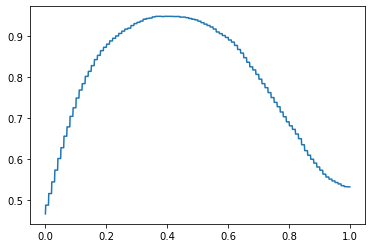

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
model = RandomForestClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
# def predict_with_threshold(X_test, model, th=0.5):
#     preds = model.predict_proba(X_test)
#     return [x[1] >= th for x in preds]
def threshold(preds, th=0.5):
    return [x[1] >= th for x in preds]
best_th = 0
best_score = 0
scores = list()
for i in tqdm(range(1000)):
    y_pred = threshold(probs, th=i/1000.0)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_th = i/1000.0
print(best_score, best_th)
xs = list(np.arange(0, 1, 0.001))
plt.plot(xs, scores)

In [46]:
y_pred = threshold(probs, th=0.401)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2917
           1       0.95      0.94      0.94      2558

    accuracy                           0.95      5475
   macro avg       0.95      0.95      0.95      5475
weighted avg       0.95      0.95      0.95      5475

